# Exam 1

### Author: Joseph Wong

## Import Packages and the Datasets

In [54]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# Datetime packages
from datetime import datetime

In [55]:
#df_netflix_data = pd.read_csv('data/netflix_data.csv')
#df_show_info = pd.read_csv('data/show_info.csv')
df1 = pd.read_csv('data/netflix_data.csv')
df2 = pd.read_csv('data/show_info.csv')
display(df1.head())
display(df2.head())

,Unnamed: 0,show_id,title,date_added,duration,listed_in,description
0,0,s1,Dick Johnson Is Dead,"September 25, 2021",90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,Blood & Water,"September 24, 2021",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,s3,Ganglands,"September 24, 2021",1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,3,s4,Jailbirds New Orleans,"September 24, 2021",1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,4,s5,Kota Factory,"September 24, 2021",2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


,Unnamed: 0,show_id,type,title,director,cast,country,release_year,rating
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA
3,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA
4,4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA


## Combine and Clean Up the Datasets

### Create Merged Dataset

In [56]:
df1.shape

(8807, 7)

In [57]:
df2.shape

(8807, 9)

In [58]:
(df1['title'] == df2['title']).value_counts()

title
True    8807
Name: count, dtype: int64

Since both datasets have 8807 observations and their 'title' columns are identical, we will perform an inner merge using the 'title' columns of the datasets. This will preserve all observations from both datasets.

In [59]:
df_merged = pd.merge(df1, df2, on='title', how='inner')
df_merged.head()

,Unnamed: 0_x,show_id_x,title,date_added,duration,listed_in,description,Unnamed: 0_y,show_id_y,type,director,cast,country,release_year,rating
0,0,s1,Dick Johnson Is Dead,"September 25, 2021",90 min,Documentaries,"As her father nears the end of his life, filmm...",0,s1,Movie,Kirsten Johnson,NaN,United States,2020,PG-13
1,1,s2,Blood & Water,"September 24, 2021",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA
2,2,s3,Ganglands,"September 24, 2021",1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2,s3,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA
3,3,s4,Jailbirds New Orleans,"September 24, 2021",1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",3,s4,TV Show,NaN,NaN,NaN,2021,TV-MA
4,4,s5,Kota Factory,"September 24, 2021",2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,4,s5,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA


In [60]:
(df_merged['show_id_x'] == df_merged['show_id_y']).value_counts()

True    8807
Name: count, dtype: int64

In [61]:
(df_merged['Unnamed: 0_x'] == df_merged['Unnamed: 0_y']).value_counts()

True    8807
Name: count, dtype: int64

The columns 'show_id_x' and 'show_id_y' as well as 'Unnamed: 0_x' and 'Unnamed: 0_y' are identical.

In [62]:
df_merged['show_id_x'] = df_merged['show_id_x'].apply(lambda x: x.split('s')[1]).astype(int)
(df_merged['show_id_x'] == df_merged.index+1).value_counts()

True    8807
Name: count, dtype: int64

In [63]:
(df_merged['Unnamed: 0_x'] == df_merged.index).value_counts()

True    8807
Name: count, dtype: int64

The columns 'Unnamed: 0_x', 'Unnamed: 0_y', 'show_id_x', 'show_id_y' contain index data that matches what is found in the index of the dataset. Therefore, these columns are unnecessary and we will remove them.

In [64]:
df = df_merged.drop(columns=['Unnamed: 0_x','Unnamed: 0_y','show_id_x','show_id_y'])
df.head()

,title,date_added,duration,listed_in,description,type,director,cast,country,release_year,rating
0,Dick Johnson Is Dead,"September 25, 2021",90 min,Documentaries,"As her father nears the end of his life, filmm...",Movie,Kirsten Johnson,NaN,United States,2020,PG-13
1,Blood & Water,"September 24, 2021",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA
2,Ganglands,"September 24, 2021",1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA
3,Jailbirds New Orleans,"September 24, 2021",1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV Show,NaN,NaN,NaN,2021,TV-MA
4,Kota Factory,"September 24, 2021",2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA


### Convert 'date_added' to Timestamp Objects

In [65]:
# create list that contains 'date_added' values (excluding nans) as strings to be converted to timestamp objects
dates = []
for string in df['date_added'][df['date_added'].notna()]:
    string = string.strip()
    split = string.split(' ')
    if (len(split[1]) == 2):
        date = split[0] + ' 0' + split[1] + ' ' + split[2]
    else:
        date = string
    dates.append(date)

In [66]:
# locate rows where 'date_added' is not a nan, focusing just on the column 'date_added'
df.loc[df['date_added'].notna(), 'date_added'] = dates

In [67]:
df['date_added'] = pd.to_datetime(df['date_added'],format="%B %d, %Y")
df.head()

,title,date_added,duration,listed_in,description,type,director,cast,country,release_year,rating
0,Dick Johnson Is Dead,2021-09-25,90 min,Documentaries,"As her father nears the end of his life, filmm...",Movie,Kirsten Johnson,NaN,United States,2020,PG-13
1,Blood & Water,2021-09-24,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA
2,Ganglands,2021-09-24,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA
3,Jailbirds New Orleans,2021-09-24,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV Show,NaN,NaN,NaN,2021,TV-MA
4,Kota Factory,2021-09-24,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA


## Data Overview

In [68]:
df.shape

(8807, 11)

There are 8,807 observations and 11 variables in the dataset

In [69]:
df.dtypes

title                   object
date_added      datetime64[ns]
duration                object
listed_in               object
description             object
type                    object
director                object
cast                    object
country                 object
release_year             int64
rating                  object
dtype: object

All of the variables in the dataset are strings except for 'date_added', which is a datetime object, and 'release_year', which is an int. 'duration' could be an int, but it is separated into two groups with different units based on the observation 'type'.

In [70]:
df.describe()

,date_added,release_year
count,8797,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-02 00:00:00,2017.000000
75%,2020-08-19 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312


Observations in the dataset were added to Netflix from January 1, 2008 to September 25, 2021. The median addition date is July 2, 2019, with a mean of of May 17, 2019.

Observations in the data set have release years ranging from 1925 to 2021. The median release year is 2017, but the mean is around 2014.180198.

The median is greater than the mean, which suggests the date added to Netflix and the release years are both skewed to the left.

### NaNs

In [71]:
df.isna().sum()

title              0
date_added        10
duration           3
listed_in          0
description        0
type               0
director        2634
cast             825
country          831
release_year       0
rating             4
dtype: int64

The columns 'date_added', 'duration', and 'rating' have a small amount of NaNs, which will not likely affect the outcomes of the analysis. The columns 'cast' and 'country' have 825 and 831 NaNs, respectively, which is a decent amount of missing data. More alarmingly, the column 'director' has 2634 NaNs, which is nearly 30% of the total number of observations in the dataset. We should take this into account when analyzing these variables, to avoid potential misrepresentation of the dataset.

## 1. How many/what countries, types, release year, and ratings are in the dataset?

In [72]:
df['country'].value_counts()

country
United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64

There are 748 countries (or combination of countries) represented in the dataset. The most frequent countries, excluding when they are credited with other countries), is the United States (2818 observations), followed by India (972), then the United Kingdom (419). Remember that the 'country' variable has 831 NaNs, so some countries may be underrepresented.

In [73]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

There are 6131 movies and 2676 TV shows in the dataset.

In [74]:
df['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1961       1
1925       1
1959       1
1966       1
1947       1
Name: count, Length: 74, dtype: int64

There are 74 release years found in the dataset. The most common is 2018 (1147 observations), followed by 2017 (1032), then 2019 (1030).

In [75]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

There are 17 ratings in the dataset. The most frequent is TV-MA (3207 observations), followed by TV-14 (2160), then TV-PG (863).

## 2. Are there any of the countries, types, release year, and ratings that are not easily counted, eg. some movies are from multiple countries?

As seen by the value counts in (1), the columns 'listed_in', 'cast', and 'country' are difficult to count specific categories because some of their values are lists. Elements in the lists are separated by ', '.

## 3. If I use dummies, can I then get some counts on how many movies were credited to each country and then do some bar plots, one for countries with a lot of movies and one for countries with fewer movies? How can I make the axis and ticks look good?

In [76]:
# create dummy variables for the countries, split by ', '
dummies = df['country'].str.get_dummies(', ')
# store sum of dummy variables (i.e. value counts of each country, including when they are credited with other countries)
country_count = dummies.sum().sort_values(ascending=False)
country_count

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Somalia              1
Sudan                1
Uganda               1
Vatican City         1
United States,       1
Length: 126, dtype: int64

In [77]:
country_count.median()

5.0

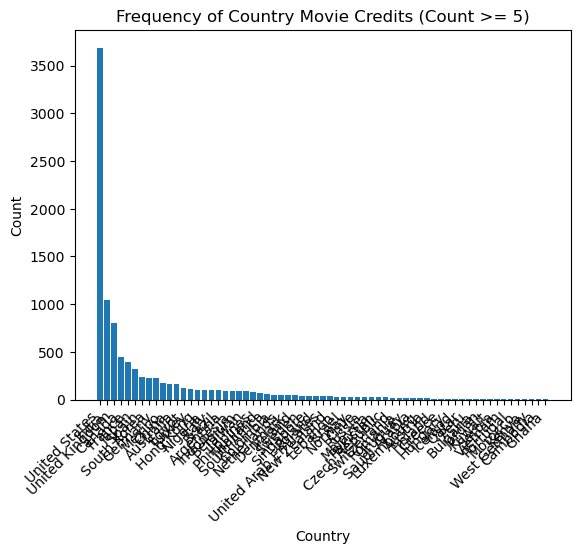

In [78]:
big_mask = country_count >= country_count.median()
plt.bar(country_count.index[big_mask], country_count[big_mask])

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Frequency of Country Movie Credits (Count >= 5)')

plt.rc('figure', figsize=(20,10))
plt.xticks(fontsize = 10, rotation = 45, ha = 'right')

plt.show()

This bar graph shows the frequency of country movie credits for countries with at least 5 credits in the dataset. The United States has a much higher frequency compared to all the other countries. It is followed by India, then the United Kingdom.

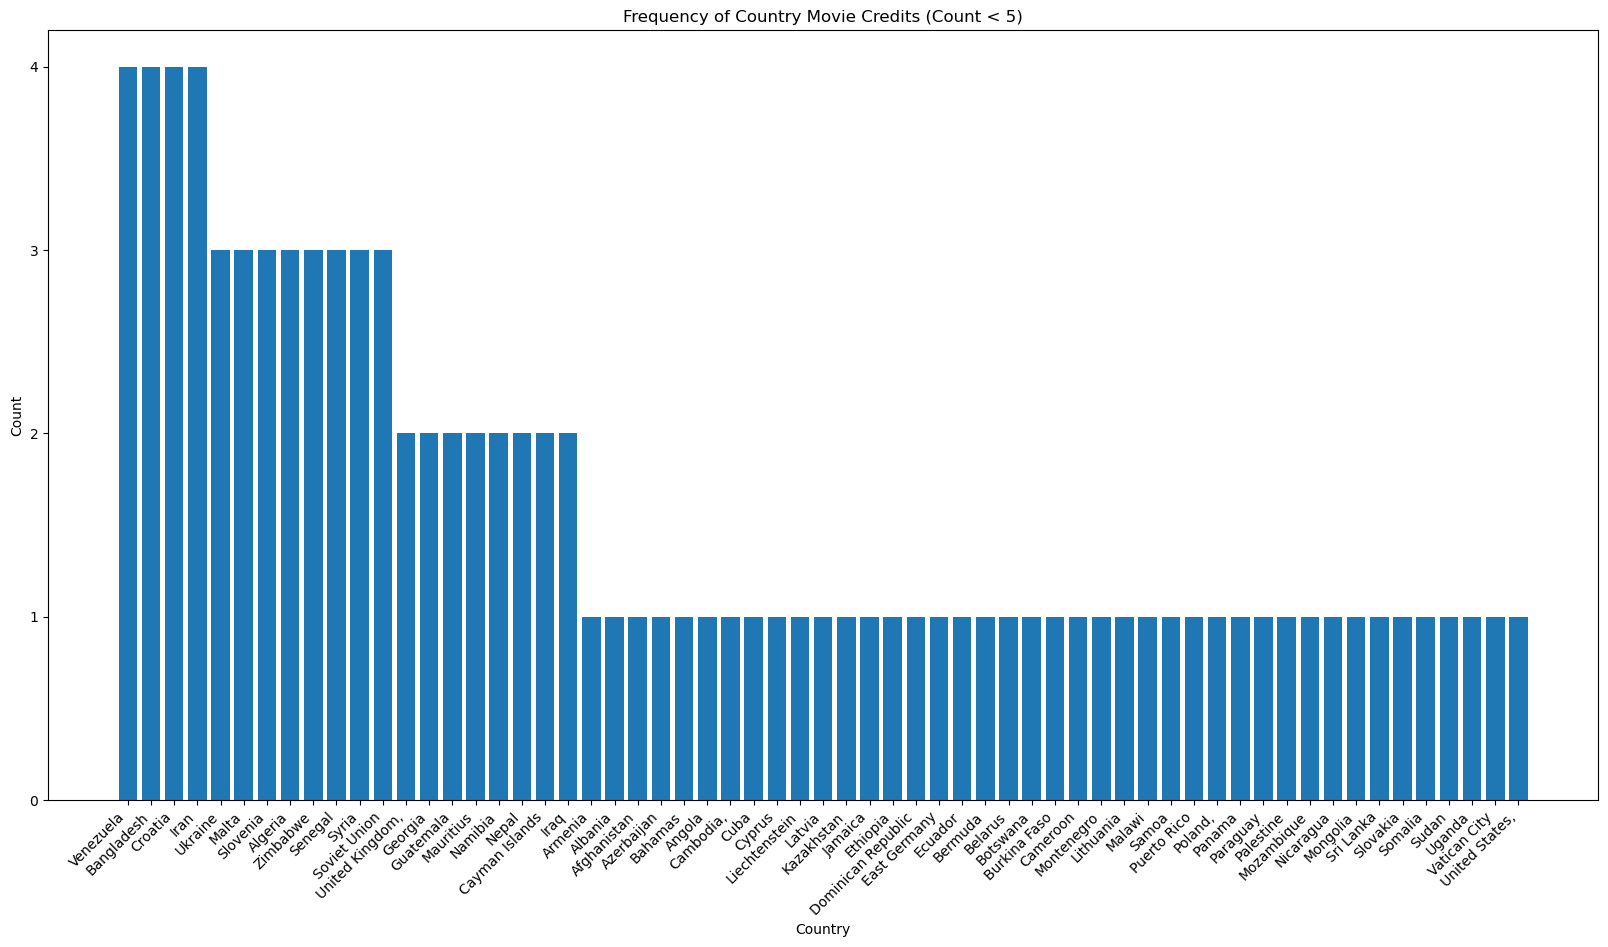

In [79]:
small_mask = country_count < country_count.median()
plt.bar(country_count.index[small_mask], country_count[small_mask])

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Frequency of Country Movie Credits (Count < 5)')

plt.xticks(fontsize = 10, rotation = 45, ha = 'right')
plt.yticks([0,1,2,3,4])

plt.show()
plt.rcdefaults()

In [80]:
country_count.value_counts().head()

1     41
3      8
2      8
11     4
4      4
Name: count, dtype: int64

This bar graph shows the frequency of country movie credits for countries with less than 5 credits in the dataset. The most frequent countries in this subset of the dataset is Venezuela, Bangladesh, Croatia, and Iran, each having 4 credits. Despite having the same number of observations, the graph of countries with fewer movie credits has a smaller range of credits. That is, there appears to be more variation in the number of credits for countries with a greater number of credits. In fact, the most frequent number of credits is 1, as 41 countries have 1 movie credit.

## 4. Is there a pattern to which titles have no country associated?
## 5. How many counts do I have for each rating and each type, movie or tv? Do the results make sense? Should I drop some data since it has so few observations?
## 6. What does a plot look like of the ratings counts for each type? Does this give me interesting information?
*Questions 5 and 6 will help us answer question 4. We will go more in-dept for question 5 after this.*

### Date Added

In [81]:
fig = px.histogram(df,
                   x='date_added',
                   facet_col=df['country'].notna(),
                   color=df['country'].notna(),
                   histnorm='percent',
                   title="Frequency of Date Added to Netflix")
fig.for_each_annotation(lambda a: a.update(text="Has Country Data" if a.text=='facet_col=True' else "No Country Data"))
fig.update_xaxes(title_text="Date Added")
fig.update_layout(yaxis_title="Percentage",
                  legend_title="Has Country Data?")
fig.show()

The frequency is shown as a percentage of whether the observation has country data or not to better compare their distributions. It appears that shows/movies without country data tend to have been added to Netflix more recently compared to shows/movies with country data. This could potentially tell us that more recent addition dates to Netflix are more likely to not have country data.

### Type

In [82]:
fig = px.pie(df,
             names=df['type'],
             facet_col=df['country'].notna(),
             title="Frequency of Type")
fig.for_each_annotation(lambda a: a.update(text="Has Country Data" if a.text=='facet_col=True' else "No Country Data"))
fig.update_layout(legend_title="Type")
fig.show()

It appears that observations without country data tends to have a greater ratio of TV shows to movies (i.e. there are a greater percentage of TV shows and a smaller percentage of movies). So, TV shows may have a potential association with lacking country data. We will take a deeper look at other potential factors within the subsets of movies and TV shows.

#### TV Shows

In [83]:
# create df with just TV show data and clean up 'duration' to be int of number of seasons
df_shows = df[df['type']=='TV Show']
df_shows.loc[:,'duration'] = df_shows['duration'].apply(lambda x: x.split(' ')[0]).astype(int)
df_shows.head()

,title,date_added,duration,listed_in,description,type,director,cast,country,release_year,rating
1,Blood & Water,2021-09-24,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA
2,Ganglands,2021-09-24,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA
3,Jailbirds New Orleans,2021-09-24,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV Show,NaN,NaN,NaN,2021,TV-MA
4,Kota Factory,2021-09-24,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA
5,Midnight Mass,2021-09-24,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,TV Show,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021,TV-MA


##### Duration

In [84]:
fig = px.histogram(df_shows,
                   x=df_shows['duration'],
                   facet_col=df_shows['country'].notna(),
                   color=df_shows['country'].notna(),
                   histnorm='percent',
                   title="Frequency of Duration (number of seasons) for TV Shows")
fig.for_each_annotation(lambda a: a.update(text="Has Country Data" if a.text=='facet_col=True' else "No Country Data"))
fig.update_xaxes(title_text="Duration (number of seasons)")
fig.update_layout(yaxis_title="Percentage",
                  legend_title="Has Country Data?")
fig.show()

There does not appear to be a significant difference in the distribution of tv show duration between having country data and not.

##### Rating

In [85]:
fig = px.pie(df_shows,
             names=df_shows['rating'],
             facet_col=df_shows['country'].notna(),
             title="Frequency of Rating for TV Shows")
fig.for_each_annotation(lambda a: a.update(text="Has Country Data" if a.text=='facet_col=True' else "No Country Data"))
fig.update_layout(legend_title="Rating",
                  autosize=False,
                  width=1000,
                  height=500)
fig.show()

It appears that the frequency of TV shows rated TV-MA is greater for shows with country data compared to those without country data. Also, there is a slight increase in frequency for shows without country data rated TV-PG, TV-Y7, and TV-Y compared to shows with country data. This potentially suggests shows without country data tend to have younger ratings (TV-PG, TV-Y7, TV-Y) while shows with country data tend to having mature ratings (TV-MA).

There are some ratings that have very low frequencies. However, the overall results of the frequency of ratings make sense because the most common ratings in the dataset are ones that are commonly associated with TV show ratings in real life. So, we will not drop the ratings with low frequencies because they may contain other important information for other variables.

#### Movies

In [86]:
# create df with just movie data and clean up 'duration' to be int of duration in minutes
df_movies = df[df['type']=='Movie']
df_movies.loc[:,'duration'] = df_movies['duration'][df_movies['duration'].notna()].apply(lambda x: x.split(' ')[0]).astype(int)
df_movies.head()

,title,date_added,duration,listed_in,description,type,director,cast,country,release_year,rating
0,Dick Johnson Is Dead,2021-09-25,90.0,Documentaries,"As her father nears the end of his life, filmm...",Movie,Kirsten Johnson,NaN,United States,2020,PG-13
6,My Little Pony: A New Generation,2021-09-24,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Movie,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021,PG
7,Sankofa,2021-09-24,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Movie,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA
9,The Starling,2021-09-24,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Movie,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13
12,Je Suis Karl,2021-09-23,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,Movie,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA


##### Duration

In [87]:
fig = px.histogram(df_movies,
                   x=df_movies['duration'],
                   facet_col=df_movies['country'].notna(),
                   color=df_movies['country'].notna(),
                   histnorm='percent',
                   title="Frequency of Duration (in minutes) for Movies",
                   nbins=50)
fig.for_each_annotation(lambda a: a.update(text="Has Country Data" if a.text=='facet_col=True' else "No Country Data"))
fig.update_xaxes(title_text="Duration (in minutes)")
fig.update_layout(yaxis_title="Percentage",
                  legend_title="Has Country Data?")
fig.show()

It appears that the distribution of movie duration is similar for both having country data and not. But, movies without country data have spikes in frequency at lower durations, which suggests a potential association between shorter movies and lacking country data.

##### Rating

In [88]:
fig = px.pie(df_movies,
             names=df_movies['rating'],
             facet_col=df_movies['country'].notna(),
             title="Frequency of Rating for Movies")
fig.for_each_annotation(lambda a: a.update(text="Has Country Data" if a.text=='facet_col=True' else "No Country Data"))
fig.update_layout(legend_title="Rating",
                  autosize=False,
                  width=1000,
                  height=600)
fig.show()

Similarly to the distribution of TV shows, it appears that movies without country data tend to have greater frequencies of younger ratings (TV-Y7, TV-Y) and lower frequencies of mature ratings (TV-MA, R). It is unclear how ratings geared towards adolescents and teens are associated with having country data as the frequency of TV-14 increases when there is no country data while the frequency of PG-13 decreases.

There are some ratings that have very low frequencies. However, for the most part, the overall results of the frequency of ratings make sense because the most common ratings in the dataset are ones that are commonly associated with movie ratings in real life. So, we will not drop the ratings with low frequencies because they may contain other important information for other variables. One concern is the ratings '74 min', '84 min', and '66 min', because those are not movie ratings. So, we will change these values into NaNs.

In [89]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [90]:
indexes = df[(df['rating'] == '74 min')| (df['rating'] == '84 min') | (df['rating'] == '66 min')].index

In [91]:
# replace weird ratings with nans
df.loc[indexes, 'rating'] = np.nan
df.loc[indexes]

,title,date_added,duration,listed_in,description,type,director,cast,country,release_year,rating
5541,Louis C.K. 2017,2017-04-04,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",Movie,Louis C.K.,Louis C.K.,United States,2017,NaN
5794,Louis C.K.: Hilarious,2016-09-16,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,Movie,Louis C.K.,Louis C.K.,United States,2010,NaN
5813,Louis C.K.: Live at the Comedy Store,2016-08-15,NaN,Movies,The comic puts his trademark hilarious/thought...,Movie,Louis C.K.,Louis C.K.,United States,2015,NaN


### Release 

In [92]:
fig = px.histogram(df,
                   x='release_year',
                   facet_col=df['country'].notna(),
                   color=df['country'].notna(),
                   histnorm='percent',
                   title="Frequency of Release Year",
                   nbins=50)
fig.for_each_annotation(lambda a: a.update(text="Has Country Data" if a.text=='facet_col=True' else "No Country Data"))
fig.update_xaxes(title_text="Release Year")
fig.update_layout(yaxis_title="Percentage",
                  legend_title="Has Country Data?")
fig.show()

It appears that shows/movies without country data tend to be released more recently compared to shows/movies with country data. The distribution of having country data increases as release year increases, but drops around 2020. The distribution of not having country data is similar in that it increases as release year increases, but it stays increasing through 2020.

### Conclusion

**In conclusion, there does appear to be a pattern to which titles have no country associated. Titles that are TV shows, have younger ratings (TV-PG, TV-Y7, TV-Y), are movies with shorter durations, and are released and added to Netflix more recently tend to lack country data.**

## 5. How many counts do I have for each rating and each type, movie or tv? Do the results make sense? Should I drop some data since it has so few observations?

### Rating

In [93]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

There are some ratings that have very few observations compared to the rest of the categories. TV-Y7-FV, NC-17, UR, 74 min, 84 min, and 66 min all have value counts 6 or less. However, the overall results make sense because the most frequent ratings in the dataset are ones that are commonly associated with show/movie ratings. So, we will not drop the ratings with low frequencies because they may contain other important information for other variables.

### Type

In [94]:
fig = px.pie(df,
             names=df['type'],
             title="Frequency of Type")
fig.update_layout(legend_title="Type",
                  autosize=False,
                  width=500,
                  height=500)
fig.show()

From the Data Basics section, we know there are 6131 movies and 2676 TV shows in the dataset. These results make sense and there are a significant number of observations of each type. So, we will not drop any types.

## 7. How can I separate the date added column into Periods using timestamp data types, and what can I learn about the different time periods? How many movies vs tv shows have been added to Netfilx each year? Have the ratings counts changed over the years, eg more R or more G rated content?

In [95]:
# create column with yearly period markers
df['added_year_period'] = df['date_added'].dt.to_period('Y')
df.head()

,title,date_added,duration,listed_in,description,type,director,cast,country,release_year,rating,added_year_period
0,Dick Johnson Is Dead,2021-09-25,90 min,Documentaries,"As her father nears the end of his life, filmm...",Movie,Kirsten Johnson,NaN,United States,2020,PG-13,2021
1,Blood & Water,2021-09-24,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2021
2,Ganglands,2021-09-24,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,2021
3,Jailbirds New Orleans,2021-09-24,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV Show,NaN,NaN,NaN,2021,TV-MA,2021
4,Kota Factory,2021-09-24,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2021


### How many movies vs tv shows have been added to Netfilx each year?

In [96]:
counts = df.groupby(['added_year_period', 'type']).size().reset_index()
counts.rename(columns={0: 'count'}, inplace=True)
counts

,added_year_period,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


In [97]:
fig = px.scatter(counts,
                 x=counts['added_year_period'].astype(str),
                 y='count',
                 color='type',
                 title="Frequency of Titles Added to Netflix Each Year")
fig.update_layout(xaxis_title="Year Added to Netflix",
                  yaxis_title="Count",
                  autosize=False,
                  width=800,
                  height=500)
fig.show()

It appears that the number of movies and TV shows added to Netflix increases up to a peak around 2019/2020 and then begins decreasing. Starting around 2014, the yearly number of movies being added to Netflix is greater than the yearly number of TV shows being added.

### Have the ratings counts changed over the years, eg more R or more G rated content?

In [98]:
df['added_year_period'] = df['added_year_period'].astype(str)
fig = px.histogram(df,
                   x='added_year_period',
                   color='rating',
                   facet_col='rating',
                   facet_col_wrap=3,
                   barmode='group',
                   histnorm='percent',
                   category_orders={'added_year_period': ["NaT",2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]},
                   title="Frequency of Ratings over Time by Rating")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(title_text="Year Added to Netflix")
fig.update_layout(autosize=False,
                  width=1000,
                  height=1000)
fig.show()

It appears that most distributions of ratings over time with a significant number of observations (i.e. we will exclude NR, G, Tv-Y7-FV, NC-17, and UR) tend to follow a similar shape: start low then increase to a peak near 2019, then start declining. One notable rating that does not follow this trend is TV-Y7, which appears to keep increasing and does not show signs of decrease.

## 8. Given a period, or year, can I calculate the most common category that tv shows or moveies were assigned to? What should I do about the fact that some content is assigned multiple categories?

In [99]:
def common_cat(period):
    period = str(period)
    df_period = df[df['added_year_period'] == period]
    
    dummies = df_period['listed_in'].str.get_dummies(', ')
    listed_in_count = dummies.sum().sort_values(ascending=False)
    print("The most common movie category in " + period + " is " + listed_in_count.head(1).index[0] + ".")

In [100]:
for y in df['added_year_period'].value_counts().index:
    common_cat(y)

The most common movie category in 2019 is International Movies.
The most common movie category in 2020 is International Movies.
The most common movie category in 2018 is International Movies.
The most common movie category in 2021 is Dramas.
The most common movie category in 2017 is International Movies.
The most common movie category in 2016 is International TV Shows.
The most common movie category in 2015 is Documentaries.
The most common movie category in 2014 is Documentaries.
The most common movie category in 2011 is Dramas.
The most common movie category in 2013 is Stand-Up Comedy.
The most common movie category in NaT is TV Comedies.
The most common movie category in 2012 is Comedies.
The most common movie category in 2009 is Dramas.
The most common movie category in 2008 is Dramas.
The most common movie category in 2010 is Cult Movies.


## 9. Who were the actors who appeared in the most films for each year? What country and films/shows was this person in? Extra - can I write a function that given a year returns this information to me?

In [101]:
def max_actor(year):
    year = str(year)
    df_year = df[df['added_year_period']==year]
    # get actor with highest frequency
    dummies = df_year['cast'].str.get_dummies(', ')
    actor_count = dummies.sum().sort_values(ascending=False)
    top = actor_count.head(1).index[0]
    df_top = df[df['cast'].str.contains(top, na=False)]
    # get country data
    dummies = df_top['country'].str.get_dummies(', ')
    country_count = dummies.sum().sort_values(ascending=False)
    countries = country_count.index[0]
    # get title data
    titles = df_top['title'].to_list()
    #print this data
    print("The actor who appeared in the most films for " + year + " is " + top + ".")
    print(top + " appeared in films with the following country attributions: ")
    print(countries)
    print(top + " appeared in films with the following titles: ")
    print(titles)
    print()

In [102]:
for y in df['added_year_period'].value_counts().index:
    max_actor(y)

The actor who appeared in the most films for 2019 is Samuel L. Jackson.
Samuel L. Jackson appeared in films with the following country attributions: 
United States
Samuel L. Jackson appeared in films with the following titles: 
['Do the Right Thing', 'Deep Blue Sea', 'Freedomland', 'Django Unchained', 'Amend: The Fight for America', 'Death to 2020', 'I Am Not Your Negro', 'The Hateful Eight: Extended Version', 'Unicorn Store', 'The Hateful Eight', '187', 'Barely Lethal', 'Black Snake Moan', 'Coach Carter', 'Jackie Brown', "National Lampoon's Loaded Weapon 1", 'Patriot Games', 'Pulp Fiction', 'S.W.A.T.', 'The Incredibles 2', 'The Other Guys', 'Turbo', 'XXx', 'XXX: State of the Union']

The actor who appeared in the most films for 2020 is Hassan Hosny.
Hassan Hosny appeared in films with the following country attributions: 
Egypt
Hassan Hosny appeared in films with the following titles: 
['The Suit', "El-Khawaga's Dilemma", 'Scarecrow', 'Mr. Romantic', 'The Student Cop', 'Either Me Or My

## 10. Which actor has appeared in the most Netflix films overall? What country and films/shows was this person in?

In [103]:
# get actor with highest frequency
dummies = df['cast'].str.get_dummies(', ')
actor_count = dummies.sum().sort_values(ascending=False)
top = actor_count.head(1).index[0]
df_top = df[df['cast'].str.contains(top, na=False)]
# get country data
dummies = df_top['country'].str.get_dummies(', ')
country_count = dummies.sum().sort_values(ascending=False)
countries = country_count.index[0]
# get title data
titles = df_top['title'].to_list()
#print this data
print("The actor who appeared in the most films is " + top + ".")
print(top + " appeared in films with the following country attributions: " + countries)
print(top + " appeared in films with the following titles: ")
print(titles)

The actor who appeared in the most films is Anupam Kher.
Anupam Kher appeared in films with the following country attributions: India
Anupam Kher appeared in films with the following titles: 
['C Kkompany', 'Kyaa Kool Hai Hum', 'Kyaa Super Kool Hain Hum', 'Kyo Kii... Main Jhuth Nahin Bolta', 'Silver Linings Playbook', 'Dil', 'Chashme Baddoor', 'Special 26', 'Prem Ratan Dhan Payo', 'Vivah', 'One Day: Justice Delivered', 'Gori Tere Pyaar Mein', 'Gumrah', 'Kuch Kuch Hota Hai', 'Hum Aapke Hain Koun', 'Game', 'Zokkomon', 'Wake Up Sid', 'Naam Shabana', 'Toilet: Ek Prem Katha', 'Rang De Basanti', 'Aiyaary', 'Paheli', 'Judwaa 2', 'The Indian Detective', 'Oh Darling Yeh Hai India', 'Chaahat', 'A Family Man', 'A Wednesday', 'Chashme Buddoor', 'Hamara Dil Aapke Paas Hai', 'Haseena Maan Jaayegi', "Jaan-E-Mann: Let's Fall in Love... Again", 'Judwaa', 'Khalnayak', 'Khosla Ka Ghosla', 'Kya Kehna', 'Mahabharat', 'Super Nani', 'Tahaan', 'The Shaukeens', 'Y.M.I.: Yeh Mera India', 'Yamla Pagla Deewana 2'

## Is there an association between movie rating and duration?

In [104]:
fig = px.histogram(df_movies,
                   x='duration',
                   title="Frequency of Duration (in minutes) for Movies",
                   nbins=50)
fig.update_layout(xaxis_title="Duration (in minutes)",
                  yaxis_title="Count")
fig.show()

In [105]:
fig = px.histogram(df_movies,
                   x='duration',
                   color='rating',
                   facet_col='rating',
                   facet_col_wrap=3,
                   title="Frequency of Duration (in minutes) for Movies by Rating",
                   nbins=50)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(legend_title="Rating",
                  autosize=False,
                  width=1000,
                  height=700)
fig.show()

It appears that most ratings follow similar distributions to the overall distribution of movie durations. However, some peak at different durations. It seems like younger ratings (PG-13, PG, TV-PG, TV-14) tend to peak at lower movie lengths compared to more mature ratings (TV-MA, R). This suggests there is a potential association between movie length and rating.

## Has the type of content being added to Netflix changed over time?

In [106]:
fig = px.histogram(df,
                   x='date_added',
                   color='type',
                   facet_col='type',
                   title="Frequency of Titles Added to Netflix Over Time",
                   nbins=30)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(title_text="Year Added to Netflix")
fig.update_layout(yaxis_title="Count",
                  legend_title="Type",
                  autosize=False,
                  width=800,
                  height=500)
fig.show()

It appears that the number of movies and the number of TV shows being added to Netflix have similar distributions over time. Both increase to a peak around 2019, then begin to decrease. However, it seems that the number of TV shows being added remains at its peak for longer, beginning its decrease around 2021, while the number of movies began its decrease around 2020. So, TV shows tended to be added to Netflix more frequently during 2020, compared to movies, in regard to their overall distributions.

## Conclusion

We have analyzed data regarding 8807 movies and TV shows added to Netflix from January 1, 2008 to September 25, 2021. The country with the most credits is the United States, with 3689 titles, followed by India, then the United Kingdom. There tends to be more movies than TV shows added to Netflix. Observations that lack country data tend to be TV shows, have younger ratings (TV-PG, TV-Y7, TV-Y), be movies with shorter durations, and be released and added to Netflix more recently. It appears that the number of movies and TV shows added to Netflix increases up to a peak around 2019/2020 and then begins decreasing, with the yearly number of movies added being greater than the yearly number of TV shows being added starting around 2014. Most ratings over time tend to increase towards 2019, then start declining, with some exceptions. The most common movie category from 2008 to 2021 is International Movies. There is a potential association between movie length and rating in that younger ratings tend to be more frequent at lower movie lengths compared to more mature ratings. When looking at the type distribution of how many movies and TV shows are being added to Netflix, they are similar. But, it is possible that TV shows were added to Netflix more frequently in 2020 in relation to the distribution of other years compared to the frequency of movies being added. In conclusion, our analysis regarding movies and TV shows on Netflix provides insights into what media is added by Netflix.